In [40]:
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from scipy import stats
import numpy as np
from decimal import Decimal
from matplotlib.ticker import MaxNLocator

from matplotlib.patches import Polygon
import pandas as pd

# Load results

In [32]:
df = np.loadtxt("/home/marcio/Projects/Random-Graph/Random-Graph/Results/lambda/lambda.txt", delimiter=",")

In [33]:
q_values = np.unique(df[:,0])

In [34]:
data = [df[:,1][df[:, 0] == q] for q in q_values]

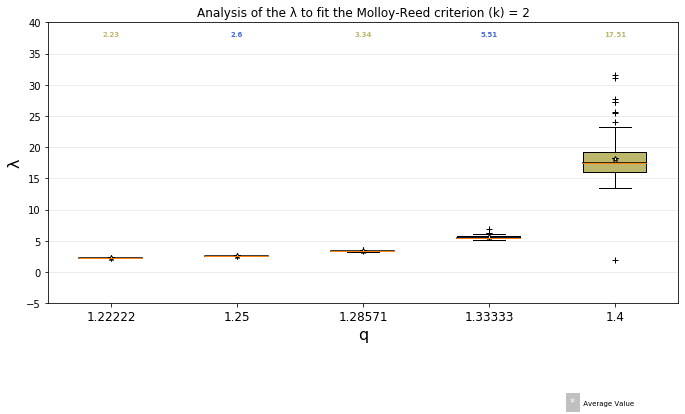

In [57]:
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Analysis of the λ to fit the Molloy-Reed criterion (k) = 2')
ax1.set_xlabel('q', fontsize=16)
ax1.set_ylabel('λ', fontsize=16)

# Now fill the boxes with desired colors
box_colors = ['darkkhaki', 'royalblue']
num_boxes = len(data)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, num_boxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(q_values, fontsize=12)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(num_boxes) + 1
upper_labels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[k], color=box_colors[k])

# Finally, add a basic legend
fig.text(0.80, 0.015, '*', color='white', backgroundcolor='silver',
         weight='roman', size='medium')
fig.text(0.815, 0.013, ' Average Value', color='black', weight='roman',
         size='x-small')

plt.savefig("molloy-reed_lambda.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')